# Peer-graded Assignment: Segmenting and Clustering Neighborhoods in Toronto
#### Submitted by Olga Fernandez Solivan

### For this assignment I explored, segemented and clustered the neighborhoods in the city of Toronto. Before we I the data to start exploring it, I need to install and import all the libraries that I will need.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests; see guidance in https://requests.readthedocs.io/en/master/user/quickstart/ 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


### Use Request to get the Wikipedia Webpage

In [29]:
Toronto_data = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
Toronto_City_Data = requests.get(Toronto_data)

### Convert table from html into a pandas dataframe

In [42]:
df_TCD_Original = pd.read_html(Toronto_City_Data.content, header=0)[0]
df_TCD_Original

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [45]:
df_TCD_Original.shape

(180, 3)

### Drop rows with "Not assigned" in the Borough Columns 

In [33]:
df_TCD_Clean_1 = df_TCD_Original[df_TCD_Original.Borough !='Not assigned'].reset_index(drop=True)
df_TCD_Clean_1.head(15) 

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


### For cells with a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough

In [34]:
#Locate the cells with a borough and a "Not assigned" neighborhood.
df_TCD_Clean_1.loc[df_TCD_Clean_1.Neighbourhood == 'Not assigned']

,Postal Code,Borough,Neighbourhood


In [39]:
#Replace the "Not assigned" with the Borough
df_TCD_Clean_2 = df_TCD_Clean_1.groupby(['Postal Code','Borough'], as_index=False).agg(lambda x: ','.join(x))
df_TCD_Clean_2

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### Print Number of Rows with Shape Method

In [46]:
df_TCD_Clean_2.shape

(103, 3)

### Upload to GitHub and Submit this Notebook to Complete Submission 1. For Submission 2, to utilize the Foursquare location data, I need to get the latitude and the longitude coordinates of each neighborhood with the Geocoder Python package: https://geocoder.readthedocs.io/index.html![image-2.png](attachment:image-2.png). 
	
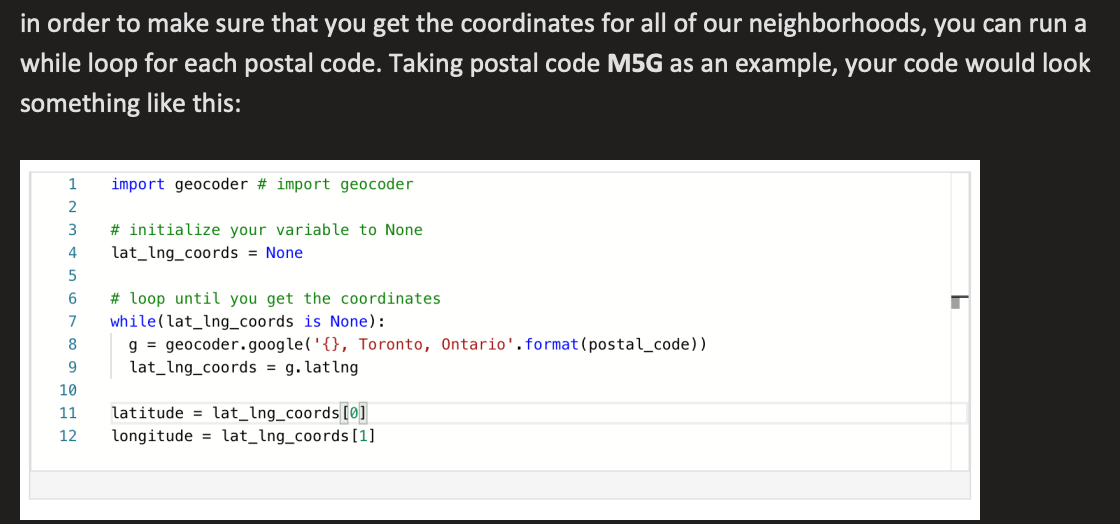


In [ ]:
# initialize your variable to None
lat_lng_coords = None

#loop until you get the coordinates
while(lat_lng_coord is None):
    g=geocoder.google('{},Toronto, Ontario'.format(postal_code))
    lat_lng_coords=g.latlng
    
latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]

#### Just in case I don't get to have the coordinates with the geocoder pachage, I downloaded the link provided for submission 2 to a csv file called "TCCoord.csv" that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

In [50]:
!wget -O TCCoord.csv https://cocl.us/Geospatial_data

--2021-01-17 21:49:15--  https://cocl.us/Geospatial_data
Resolving cocl.us (cocl.us)... 169.63.96.176, 169.63.96.194
Connecting to cocl.us (cocl.us)|169.63.96.176|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2021-01-17 21:49:16--  https://ibm.box.com/shared/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.29.197
Connecting to ibm.box.com (ibm.box.com)|107.152.29.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]
--2021-01-17 21:49:16--  https://ibm.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/9afzr83pps4pwf2smjjcf1y5mvgb18rr.csv [following]


In [51]:
TC_Coord = pd.read_csv("TCCoord.csv", delimiter=",")
TC_Coord [0:5]

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Add Coordinates to Pandas database

#### First check that both tables have the same shape

In [58]:
TC_Coord.shape

(103, 3)

#### Since the shapes of TC-Coord and df_TCD_Clean_2 are the same, I can join both tables and create a new database smilar to the one requested for submission 2 

In [59]:
df_TCD_Clean_3 = df_TCD_Clean_2.join(TC_Coord.set_index('Postal Code'), on ='Postal Code')

In [60]:
df_TCD_Clean_3.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
